In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# =========================
# Dataset personalizado
# =========================

class PlacaDataset(Dataset):
    def __init__(self, X_path, Y_path):
        
        self.X = np.load(X_path).astype(np.float32)
        self.Y = np.load(Y_path).astype(np.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

# =========================
# Definición del modelo
# =========================
class MLPTempRegressor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim)
        )

    def forward(self, x):
        return self.model(x)

# =========================
# Configuración
# =========================
X_path = 'C:/Users/royer/Documents/ProyectoFinalModelado/data/dataset_5000_test/X.npy'
Y_path = 'C:/Users/royer/Documents/ProyectoFinalModelado/data/dataset_5000_test/Y.npy'

dataset = PlacaDataset(X_path, Y_path)
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

input_dim = dataset.X.shape[1]
output_dim = dataset.Y.shape[1]

model = MLPTempRegressor(input_dim, output_dim)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs = 1000

# =========================
# Entrenamiento
# =========================
loss_history = []

for epoch in range(epochs):
    running_loss = 0.0
    for X_batch, Y_batch in dataloader:
        X_batch = X_batch.to(device)
        Y_batch = Y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(dataloader)
    loss_history.append(avg_loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {avg_loss:.6f}")

print("Entrenamiento finalizado.")

Epoch 0, Loss: 1751954.548772
Epoch 10, Loss: 1553895.226463
Epoch 20, Loss: 1351123.643171
Epoch 30, Loss: 1150566.171089
Epoch 40, Loss: 940909.273987
Epoch 50, Loss: 979059.450205
Epoch 60, Loss: 808991.490902
Epoch 70, Loss: 690098.051892
Epoch 80, Loss: 616714.485723
Epoch 90, Loss: 625696.804525
Epoch 100, Loss: 557604.036167
Epoch 110, Loss: 691735.092340
Epoch 120, Loss: 375045.989192
Epoch 130, Loss: 365145.752459
Epoch 140, Loss: 386902.651096
Epoch 150, Loss: 271501.835338
Epoch 160, Loss: 420138.621531
Epoch 170, Loss: 229177.712822
Epoch 180, Loss: 277351.742812
Epoch 190, Loss: 229910.761351
Epoch 200, Loss: 303634.800869
Epoch 210, Loss: 352631.218095
Epoch 220, Loss: 450182.259085
Epoch 230, Loss: 215276.941456
Epoch 240, Loss: 291027.191930
Epoch 250, Loss: 165083.069064
Epoch 260, Loss: 190721.294853
Epoch 270, Loss: 192829.035418
Epoch 280, Loss: 258269.096277
Epoch 290, Loss: 293168.237339
Epoch 300, Loss: 191110.513585
Epoch 310, Loss: 218039.537883
Epoch 320, Loss

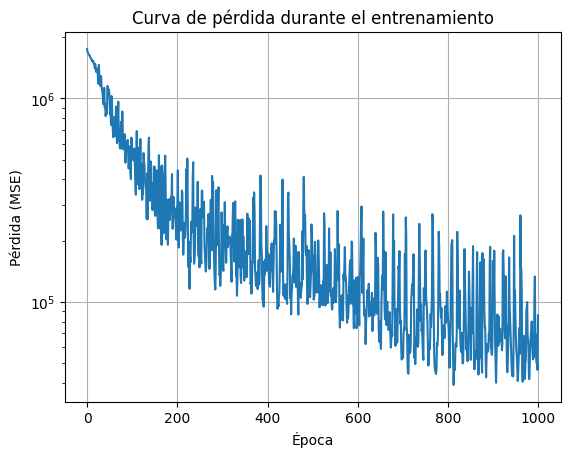

In [3]:
# =========================
# Visualización de la pérdida
# =========================
plt.figure()
plt.semilogy(loss_history)
plt.xlabel("Época")
plt.ylabel("Pérdida (MSE)")
plt.title("Curva de pérdida durante el entrenamiento")
plt.grid()
plt.show()


In [28]:
import sys
sys.path.append('C:/Users/royer/Documents/ProyectoFinalModelado/scr')

from solver_fd import temp_chapa_P, temp_chapa_P2
from utils import graficarChapa, comparar_T

Comparación de distribuciones:
Diferencia máxima: 925.0084 °C
Diferencia media:  267.1396 °C
Desvío estándar:   233.0447 °C


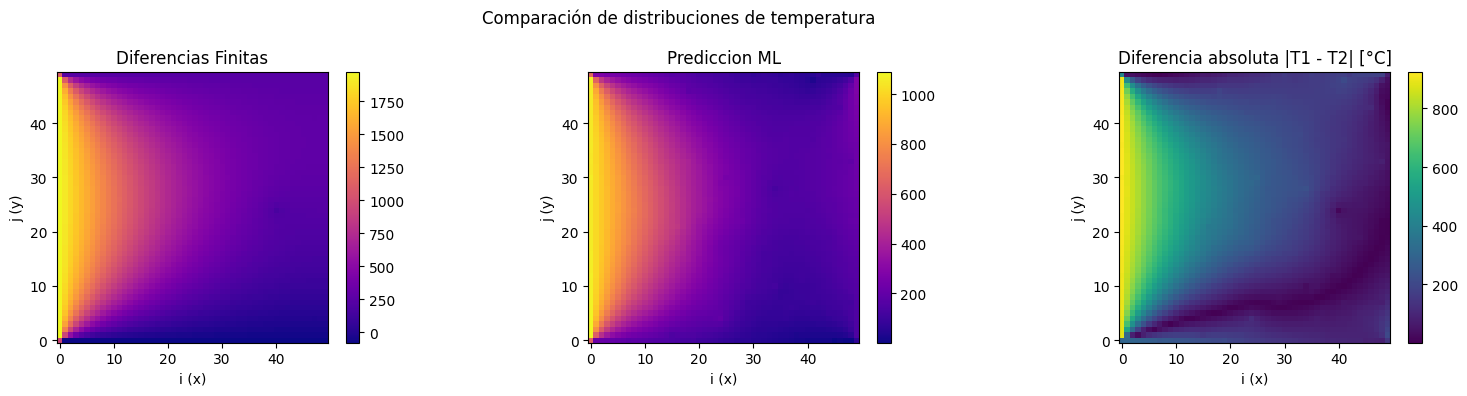

In [ ]:
# =========================
# Evaluación de resultados
# =========================
# Seleccionar una muestra para visualizar
X_sample, Y_true = dataset[997]

X_sample_tensor = torch.tensor(X_sample).unsqueeze(0).to(device)#   Convierte a un tensor de PyTorch

Y_pred = model(X_sample_tensor).detach().cpu().numpy().reshape(50, 50)  # Ajustar según Nx, Ny

Y_true_reshaped = Y_true.reshape(50, 50)

comparar_T(Y_true_reshaped, Y_pred, 50, 50, etiquetas=('Diferencias Finitas', 'Prediccion ML'))

In [5]:
# =========================
# Guardar modelo entrenado
# =========================
model_save_path = 'C:/Users/royer/Documents/ProyectoFinalModelado/results/modelo_temp_ML3.pt'
torch.save(model.state_dict(), model_save_path)
print(f"Modelo guardado en: {model_save_path}")

Modelo guardado en: C:/Users/royer/Documents/ProyectoFinalModelado/results/modelo_temp_ML3.pt
